# taking reviews from amazon

# one plus 9 customer comments

In [1]:
from bs4 import BeautifulSoup as bs
import requests

In [2]:
link = 'https://www.amazon.in/Test-Exclusive_2020_1176-Multi-3GB-Storage/product-reviews/B089MV1ZSM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [3]:
page = requests.get(link)

In [4]:
page

<Response [200]>

In [5]:
page.content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41wZkyTaWoL.css,31Y8m1dzTdL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,21N4kUH7pxL.css,01oDR3IULNL.css,41CYNGpGlrL.css,01XPHJk60-L.css,114y0SIP+yL.css,21aPhFy+riL.c

In [6]:
soup = bs(page.content,'html.parser')

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:end-feature:cs-optimization -->
  <!-- sp:feature:aui-assets -->
  <link href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41wZkyTaWoL.css,31Y8m1dzTdL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,21N4kUH7pxL.css,01oDR3IULNL.css,41CYNGpGlrL.css,01XPHJk60-L.css,114y0SIP+yL.css,21aPhFy+riL

In [8]:
review = soup.find_all("span",{"data-hook":"review-body"})
review

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   The product just overheating.. it is unbelievable from such great company production devices.  Here the cost does not matter but product quality is matters.<br/><br/>1. builtin Alex is not working<br/>2. Average camera<br/>3. Overheating.<br/><br/>I have been one plus 6t device since 2.5 so far single problem face.. I just upgraded to one plus 9 but it seems to be the worst decision. I did it as I am feeling now.
 </span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   Just got d phone today... frm day 1 too much overheating issue... Not possible to use...<br/>Also battery issue, 20% battery drained out in 15 minutes...
 </span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   One day delivery. Very fast. Kuddos on that.<br/>The phone is amazing. No complains so far. 3 days of heav

In [9]:
len(review)

10

In [10]:
review_content = []
for i in range(0,len(review)):
    review_content.append(review[i].get_text())
review_content

['\n\n  The product just overheating.. it is unbelievable from such great company production devices.  Here the cost does not matter but product quality is matters.1. builtin Alex is not working2. Average camera3. Overheating.I have been one plus 6t device since 2.5 so far single problem face.. I just upgraded to one plus 9 but it seems to be the worst decision. I did it as I am feeling now.\n\n',
 '\n\n  Just got d phone today... frm day 1 too much overheating issue... Not possible to use...Also battery issue, 20% battery drained out in 15 minutes...\n\n',
 "\n\n  One day delivery. Very fast. Kuddos on that.The phone is amazing. No complains so far. 3 days of heavy usage to check battery camera music everything.Would definitely say one of the best cameras. Sound could have been louder but not at all bad. Battery is excellent. Interface touch smoothness WOW.Didn't give 5 stars as always scope of improvement. But overall go for it. Remain a one plus fan\n\n",
 "\n\n  Dear Buyers,I bough

In [11]:
review_content[:] = [review.lstrip('\n') for review in review_content]
review_content

['  The product just overheating.. it is unbelievable from such great company production devices.  Here the cost does not matter but product quality is matters.1. builtin Alex is not working2. Average camera3. Overheating.I have been one plus 6t device since 2.5 so far single problem face.. I just upgraded to one plus 9 but it seems to be the worst decision. I did it as I am feeling now.\n\n',
 '  Just got d phone today... frm day 1 too much overheating issue... Not possible to use...Also battery issue, 20% battery drained out in 15 minutes...\n\n',
 "  One day delivery. Very fast. Kuddos on that.The phone is amazing. No complains so far. 3 days of heavy usage to check battery camera music everything.Would definitely say one of the best cameras. Sound could have been louder but not at all bad. Battery is excellent. Interface touch smoothness WOW.Didn't give 5 stars as always scope of improvement. But overall go for it. Remain a one plus fan\n\n",
 "  Dear Buyers,I bought this phone for

In [12]:
review_content[:] = [review.rstrip('\n') for review in review_content]
review_content

['  The product just overheating.. it is unbelievable from such great company production devices.  Here the cost does not matter but product quality is matters.1. builtin Alex is not working2. Average camera3. Overheating.I have been one plus 6t device since 2.5 so far single problem face.. I just upgraded to one plus 9 but it seems to be the worst decision. I did it as I am feeling now.',
 '  Just got d phone today... frm day 1 too much overheating issue... Not possible to use...Also battery issue, 20% battery drained out in 15 minutes...',
 "  One day delivery. Very fast. Kuddos on that.The phone is amazing. No complains so far. 3 days of heavy usage to check battery camera music everything.Would definitely say one of the best cameras. Sound could have been louder but not at all bad. Battery is excellent. Interface touch smoothness WOW.Didn't give 5 stars as always scope of improvement. But overall go for it. Remain a one plus fan",
 "  Dear Buyers,I bought this phone for my younger 

In [13]:
len(review_content)

10

In [14]:
import pandas as pd

In [15]:
df = pd.DataFrame()

In [16]:
df['Reviews'] = review_content

In [17]:
df

,Reviews
0,The product just overheating.. it is unbelie...
1,Just got d phone today... frm day 1 too much...
2,One day delivery. Very fast. Kuddos on that....
3,"Dear Buyers,I bought this phone for my young..."
4,SENDING USED PRODUCT TO CUSTOMERSI BOUGHT IT...
5,Oneplus is cheating us on 5gLook at the pric...
6,Network performance not good and camera per...
7,"Strange change in features, automatic call r..."
8,This product is not worth the price. I have ...
9,"हर्षद मेहता की तरह चुना लगा दिया,हेसल ब्लेड ..."


In [18]:
df.to_csv(r"reviews.csv",index=True)

# Emotion minning on customer reviews

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv("reviews.csv")

In [21]:
df

,Unnamed: 0,Reviews
0,0,The product just overheating.. it is unbelie...
1,1,Just got d phone today... frm day 1 too much...
2,2,One day delivery. Very fast. Kuddos on that....
3,3,"Dear Buyers,I bought this phone for my young..."
4,4,SENDING USED PRODUCT TO CUSTOMERSI BOUGHT IT...
5,5,Oneplus is cheating us on 5gLook at the pric...
6,6,Network performance not good and camera per...
7,7,"Strange change in features, automatic call r..."
8,8,This product is not worth the price. I have ...
9,9,"हर्षद मेहता की तरह चुना लगा दिया,हेसल ब्लेड ..."


In [22]:
df = df.drop('Unnamed: 0',axis=1)

In [23]:
df

,Reviews
0,The product just overheating.. it is unbelie...
1,Just got d phone today... frm day 1 too much...
2,One day delivery. Very fast. Kuddos on that....
3,"Dear Buyers,I bought this phone for my young..."
4,SENDING USED PRODUCT TO CUSTOMERSI BOUGHT IT...
5,Oneplus is cheating us on 5gLook at the pric...
6,Network performance not good and camera per...
7,"Strange change in features, automatic call r..."
8,This product is not worth the price. I have ...
9,"हर्षद मेहता की तरह चुना लगा दिया,हेसल ब्लेड ..."


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  10 non-null     object
dtypes: object(1)
memory usage: 208.0+ bytes


In [25]:
df.isnull().sum()

Reviews    0
dtype: int64

In [26]:
df = [Reviews.strip() for Reviews in df.Reviews]
df = [Reviews for Reviews in df if Reviews]

In [27]:
df

['The product just overheating.. it is unbelievable from such great company production devices.  Here the cost does not matter but product quality is matters.1. builtin Alex is not working2. Average camera3. Overheating.I have been one plus 6t device since 2.5 so far single problem face.. I just upgraded to one plus 9 but it seems to be the worst decision. I did it as I am feeling now.',
 'Just got d phone today... frm day 1 too much overheating issue... Not possible to use...Also battery issue, 20% battery drained out in 15 minutes...',
 "One day delivery. Very fast. Kuddos on that.The phone is amazing. No complains so far. 3 days of heavy usage to check battery camera music everything.Would definitely say one of the best cameras. Sound could have been louder but not at all bad. Battery is excellent. Interface touch smoothness WOW.Didn't give 5 stars as always scope of improvement. But overall go for it. Remain a one plus fan",
 "Dear Buyers,I bought this phone for my younger brother 

In [28]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(df))
sentences

['The product just overheating.. it is unbelievable from such great company production devices.',
 'Here the cost does not matter but product quality is matters.1.',
 'builtin Alex is not working2.',
 'Average camera3.',
 'Overheating.I have been one plus 6t device since 2.5 so far single problem face..',
 'I just upgraded to one plus 9 but it seems to be the worst decision.',
 'I did it as I am feeling now.',
 'Just got d phone today... frm day 1 too much overheating issue... Not possible to use...Also battery issue, 20% battery drained out in 15 minutes... One day delivery.',
 'Very fast.',
 'Kuddos on that.The phone is amazing.',
 'No complains so far.',
 '3 days of heavy usage to check battery camera music everything.Would definitely say one of the best cameras.',
 'Sound could have been louder but not at all bad.',
 'Battery is excellent.',
 "Interface touch smoothness WOW.Didn't give 5 stars as always scope of improvement.",
 'But overall go for it.',
 'Remain a one plus fan Dear

In [29]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,The product just overheating.. it is unbelieva...
1,Here the cost does not matter but product qual...
2,builtin Alex is not working2.
3,Average camera3.
4,Overheating.I have been one plus 6t device sin...
5,I just upgraded to one plus 9 but it seems to ...
6,I did it as I am feeling now.
7,Just got d phone today... frm day 1 too much o...
8,Very fast.
9,Kuddos on that.The phone is amazing.


In [30]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [31]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [32]:
import string 
import spacy

nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [33]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [34]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0     13
1     11
2      5
3      2
4     14
5     15
6      8
7     28
8      2
9      6
10     4
11    18
12    10
13     3
14    12
15     5
16    18
17    12
18    30
19    12
20     6
21    13
22     3
23    16
24    23
25     2
26    19
27     9
28    28
29    19
30     3
31    10
32    74
33    10
34     5
35    11
36    22
Name: word_count, dtype: int64

In [35]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
32,SENDING USED PRODUCT TO CUSTOMERSI BOUGHT IT W...,-4,74
12,Sound could have been louder but not at all bad.,-3,10
5,I just upgraded to one plus 9 but it seems to ...,-3,15
10,No complains so far.,-3,4
4,Overheating.I have been one plus 6t device sin...,-2,14
31,And now we are stuck with this worthless heati...,-2,10
26,The amount paid for this phone doesn't justify...,-1,19
23,The battery doesn't last more than 5 hours aft...,0,16
22,Battery Draining issue.,0,3
21,Gets so much hot while charging that a human h...,0,13


In [36]:
sent_df['sentiment_value'].describe()

count    37.000000
mean      0.567568
std       2.141398
min      -4.000000
25%       0.000000
50%       0.000000
75%       2.000000
max       5.000000
Name: sentiment_value, dtype: float64

In [37]:
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
2,builtin Alex is not working2.,0,5
3,Average camera3.,0,2
4,Overheating.I have been one plus 6t device sin...,-2,14
5,I just upgraded to one plus 9 but it seems to ...,-3,15
6,I did it as I am feeling now.,0,8


In [38]:
sent_df[sent_df['sentiment_value']>3].head()['sentence'].tolist()[0]

'Kuddos on that.The phone is amazing.'

In [39]:
sent_df['index']=range(0,len(sent_df))

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

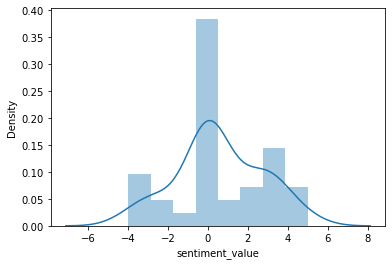

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

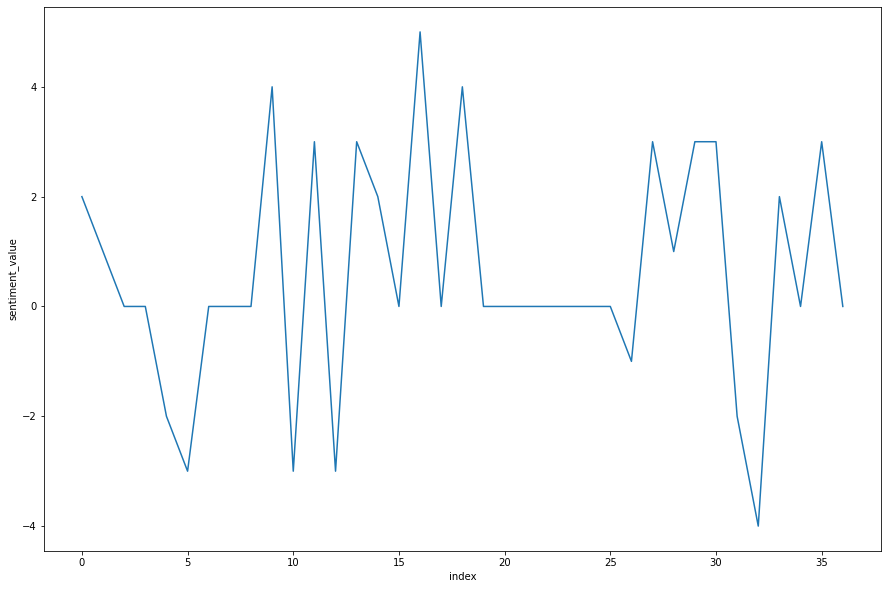

In [41]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

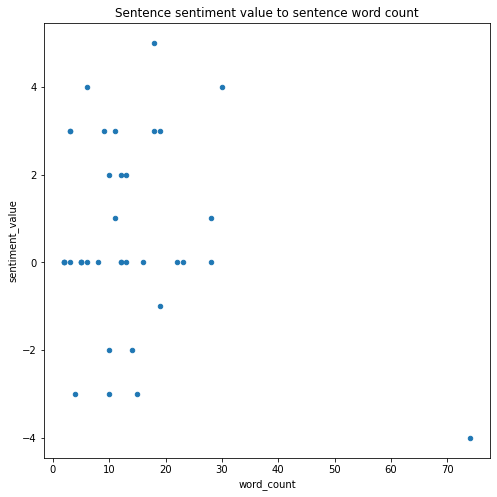

In [42]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

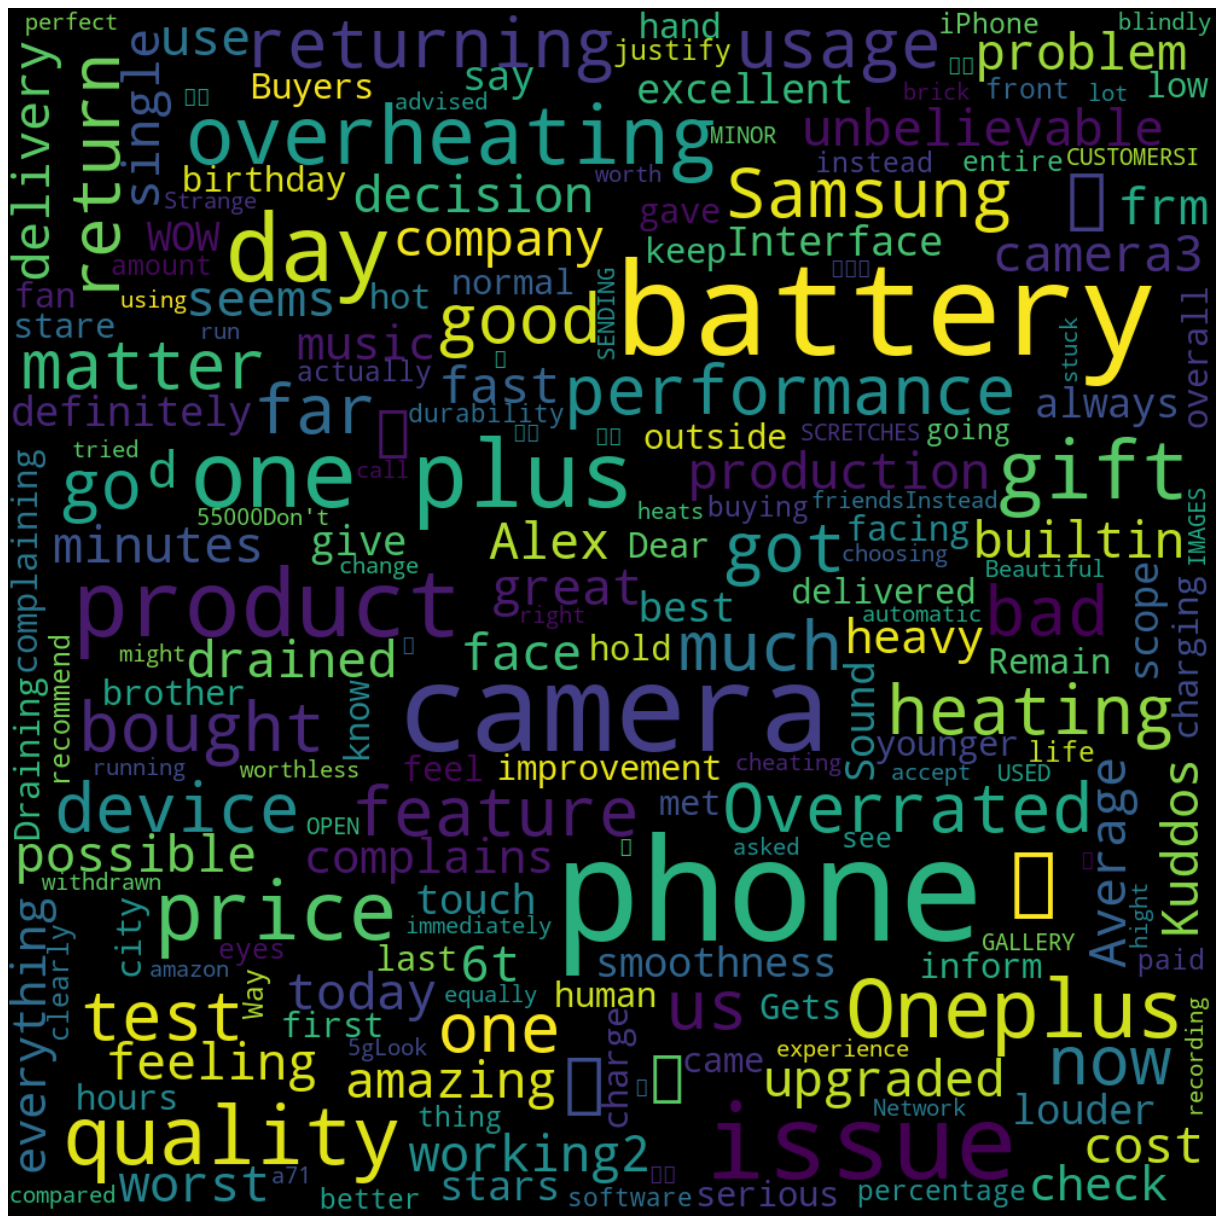

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in sent_df["sentence"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [44]:
sent_df

,sentence,sentiment_value,word_count,index
0,The product just overheating.. it is unbelieva...,2,13,0
1,Here the cost does not matter but product qual...,1,11,1
2,builtin Alex is not working2.,0,5,2
3,Average camera3.,0,2,3
4,Overheating.I have been one plus 6t device sin...,-2,14,4
5,I just upgraded to one plus 9 but it seems to ...,-3,15,5
6,I did it as I am feeling now.,0,8,6
7,Just got d phone today... frm day 1 too much o...,0,28,7
8,Very fast.,0,2,8
9,Kuddos on that.The phone is amazing.,4,6,9


In [45]:
sent_df.sentiment_value.value_counts()

 0    16
 3     6
 2     3
-3     3
 1     2
-2     2
 4     2
 5     1
-1     1
-4     1
Name: sentiment_value, dtype: int64

As we can see most of the sentiment values are '0' so this is a neutral text